# The Python `Canopy` Package from Somalogic, Inc.

![cover](https://img.shields.io/badge/coverage-97-success.svg?style=flat&logo=codecov)
[![License:
MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://choosealicense.com/licenses/mit/)

-----

## Overview

This document accompanies the Python package `canopy`, which loads the SomaLogic, Inc. proprietary data file called an `*.adat`. The package provides auxiliary functions for extracting relevant information from the ADAT object once in the Python environment. Basic familiarity with the Python environment is assumed, as is the ability to install contributed packages from the Python Package Installer (pip)

-----

## Installation
The easiest way to install `Canopy` is to install directly from
GitHub:

``` bash
pip install git+https://github.com/SomaLogic/canopy.git#egg=canopy
```

Alternatively, if you wish to develop or change the source code, you may clone the repository and install manually via:

``` bash
git clone https://github.com/SomaLogic/canopy.git
pip install -e ./canopy
```

### Dependencies

`Python >3.8` is required to install `canopy`. The following package dependencies are installed on a `pip install`:
  - `pandas >= 1.1.0`
  - `numpy >= 1.19.1`



## Basics

Upon installation, load `canopy` as normal:

In [1]:
import canopy

### For a traversable index of the library:

In [2]:
help(canopy)
# help(canopy.adat) ... etc

Help on package canopy:

NAME
    canopy

PACKAGE CONTENTS
    adat
    base (package)
    data (package)
    errors
    io (package)
    tools (package)

FILE
    /Users/jallison/Code/canopy/canopy/__init__.py




### Internal Objects

The `canopy` package comes with one internal object available to users to run canned examples (or analyses). It can be accessed by perform the import:

  - `from canopy.data.example_data import example_data`

## Main Features (I/O)

  - Loading data (Import)
      - Import a text file in the `*.adat` format into a `Python` session as an `adat` object.
  - Wrangling data (Manipulation)
      - Subset, reorder, and list various fields of an `adat` object.
  - Exporting data (Output)
      - Write out an `adat` object as a `*.adat` text file.

-----

### Loading an ADAT

Loading the sample file from within the canopy library via its path

In [3]:
adat = canopy.read_file('./canopy/data/example_data.adat')
type(adat)

canopy.adat.Adat

In [4]:
adat.columns

MultiIndex([( '10000-28', '3', 'SL019233', ...),
            (  '10001-7', '3', 'SL002564', ...),
            ( '10003-15', '3', 'SL019245', ...),
            ( '10006-25', '3', 'SL019228', ...),
            ( '10008-43', '3', 'SL019234', ...),
            ( '10011-65', '3', 'SL019246', ...),
            (  '10012-5', '3', 'SL014669', ...),
            ( '10013-34', '3', 'SL025418', ...),
            ( '10014-31', '3', 'SL007803', ...),
            ('10015-119', '3', 'SL014924', ...),
            ...
            (  '9981-18', '3', 'SL018293', ...),
            (  '9983-97', '3', 'SL019202', ...),
            (  '9984-12', '3', 'SL019205', ...),
            (  '9986-14', '3', 'SL005356', ...),
            (  '9989-12', '3', 'SL019194', ...),
            (  '9993-11', '3', 'SL019212', ...),
            ( '9994-217', '3', 'SL019217', ...),
            (   '9995-6', '3', 'SL013164', ...),
            (  '9997-12', '3', 'SL019215', ...),
            (   '9999-1', '3', 'SL019231', ...)],
   

In [6]:
from IPython.display import HTML
#Display the first five rows and columns of the adat
HTML(adat.iloc[:5,:5].to_html()) # Need to use HTML & to_html() here to display nicely for this README
# Output is left-right scrollable in both this readme and Jupyter notebooks

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,SeqId,10000-28,10001-7,10003-15,10006-25,10008-43
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,SeqIdVersion,3,3,3,3,3
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,SomaId,SL019233,SL002564,SL019245,SL019228,SL019234
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,TargetFullName,Beta-crystallin B2,RAF proto-oncogene serine/threonine-protein kinase,Zinc finger protein 41,ETS domain-containing protein Elk-1,Guanylyl cyclase-activating protein 1
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Target,CRBB2,c-Raf,ZNF41,ELK1,GUC1A
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,UniProt,P43320,P04049,P51814,P19419,P43080
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,EntrezGeneID,1415,5894,7592,2002,2978
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,EntrezGeneSymbol,CRYBB2,RAF1,ZNF41,ELK1,GUCA1A
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Organism,Human,Human,Human,Human,Human
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Units,RFU,RFU,RFU,RFU,RFU
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Type,Protein,Protein,Protein,Protein,Protein


You may also access the dict header metadata via:

In [7]:
adat.header_metadata

{'!AdatId': 'GID-1234-56-789-abcdef',
 '!Version': '1.2',
 '!AssayType': 'PharmaServices',
 '!AssayVersion': 'V4',
 '!AssayRobot': 'Fluent 1 L-307',
 '!Legal': 'Experiment details and data have been processed to protect Personally Identifiable Information (PII) and comply with existing privacy laws.',
 '!CreatedBy': 'PharmaServices',
 '!CreatedDate': '2020-07-24',
 '!EnteredBy': 'Technician1',
 '!ExpDate': '2020-06-18, 2020-07-20',
 '!GeneratedBy': 'Px (Build:  : ), Canopy_0.1.1',
 '!RunNotes': "2 columns ('Age' and 'Sex') have been added to this ADAT. Age has been randomly increased or decreased by 1-2 years to protect patient information",
 '!ProcessSteps': 'Raw RFU, Hyb Normalization, medNormInt (SampleId), plateScale, Calibration, anmlQC, qcCheck, anmlSMP',
 '!ProteinEffectiveDate': '2019-08-06',
 '!StudyMatrix': 'EDTA Plasma',
 '!PlateType': '',
 '!LabLocation': 'SLUS',
 '!StudyOrganism': '',
 '!Title': 'Example Adat Set001, Example Adat Set002',
 '!AssaySite': 'SW',
 '!Calibrator

Canopy's Adat object inherits the pandas printing methods which displays nicely in Jupyter Notebooks when using `IPython.display.display()`.

### Wrangling
Dataframe `columns` Contain Feature Information

In [8]:
# Using the `adat` loaded from above
aptamer_df = adat.columns.to_frame(index=False)
type(aptamer_df)

pandas.core.frame.DataFrame

In [9]:
HTML(aptamer_df.head(5).to_html())

,SeqId,SeqIdVersion,SomaId,TargetFullName,Target,UniProt,EntrezGeneID,EntrezGeneSymbol,Organism,Units,Type,Dilution,PlateScale_Reference,CalReference,Cal_Example_Adat_Set001,ColCheck,CalQcRatio_Example_Adat_Set001_170255,QcReference_170255,Cal_Example_Adat_Set002,CalQcRatio_Example_Adat_Set002_170255
0,10000-28,3,SL019233,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,20,687.4,687.4,1.01252025,PASS,1.008,505.4,1.01476233,1.067
1,10001-7,3,SL002564,RAF proto-oncogene serine/threonine-protein kinase,c-Raf,P04049,5894,RAF1,Human,RFU,Protein,20,227.8,227.8,1.01605709,PASS,0.970,223.9,1.03686846,1.007
2,10003-15,3,SL019245,Zinc finger protein 41,ZNF41,P51814,7592,ZNF41,Human,RFU,Protein,0.5,126.9,126.9,0.95056180,PASS,1.046,119.6,1.15258856,0.981
3,10006-25,3,SL019228,ETS domain-containing protein Elk-1,ELK1,P19419,2002,ELK1,Human,RFU,Protein,20,634.2,634.2,0.99607350,PASS,1.042,667.2,0.93581231,1.026
4,10008-43,3,SL019234,Guanylyl cyclase-activating protein 1,GUC1A,P43080,2978,GUCA1A,Human,RFU,Protein,20,585.0,585.0,0.94051447,PASS,1.036,587.5,0.96201283,0.998


### Accessing feature data

The `.to_frame()` method creates a lookup table that links the feature names in the `adat` object to the annotation data in `columns`:

In [10]:
col_df = adat.columns.to_frame(index=False)
type(col_df)

pandas.core.frame.DataFrame

In [11]:
HTML(col_df.head(5).to_html())

,SeqId,SeqIdVersion,SomaId,TargetFullName,Target,UniProt,EntrezGeneID,EntrezGeneSymbol,Organism,Units,Type,Dilution,PlateScale_Reference,CalReference,Cal_Example_Adat_Set001,ColCheck,CalQcRatio_Example_Adat_Set001_170255,QcReference_170255,Cal_Example_Adat_Set002,CalQcRatio_Example_Adat_Set002_170255
0,10000-28,3,SL019233,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,RFU,Protein,20,687.4,687.4,1.01252025,PASS,1.008,505.4,1.01476233,1.067
1,10001-7,3,SL002564,RAF proto-oncogene serine/threonine-protein kinase,c-Raf,P04049,5894,RAF1,Human,RFU,Protein,20,227.8,227.8,1.01605709,PASS,0.970,223.9,1.03686846,1.007
2,10003-15,3,SL019245,Zinc finger protein 41,ZNF41,P51814,7592,ZNF41,Human,RFU,Protein,0.5,126.9,126.9,0.95056180,PASS,1.046,119.6,1.15258856,0.981
3,10006-25,3,SL019228,ETS domain-containing protein Elk-1,ELK1,P19419,2002,ELK1,Human,RFU,Protein,20,634.2,634.2,0.99607350,PASS,1.042,667.2,0.93581231,1.026
4,10008-43,3,SL019234,Guanylyl cyclase-activating protein 1,GUC1A,P43080,2978,GUCA1A,Human,RFU,Protein,20,585.0,585.0,0.94051447,PASS,1.036,587.5,0.96201283,0.998


### Display features

In [12]:
adat.columns.get_level_values('SeqId')[:20] # first 20 features

Index(['10000-28', '10001-7', '10003-15', '10006-25', '10008-43', '10011-65',
       '10012-5', '10013-34', '10014-31', '10015-119', '10021-1', '10022-207',
       '10023-32', '10024-44', '10030-8', '10034-16', '10035-6', '10036-201',
       '10037-98', '10040-63'],
      dtype='object', name='SeqId')

### Get # Features

In [13]:
adat.shape[1]

5284

### Clinical Data

Dataframe `index` Contains Sample Information

In [14]:
# Using the `adat` loaded from above
sample_df = adat.index.to_frame(index=False)
type(sample_df)

pandas.core.frame.DataFrame

In [15]:
HTML(sample_df.head(5).to_html())

,PlateId,PlateRunDate,ScannerID,PlatePosition,SlideId,Subarray,SampleId,SampleType,PercentDilution,SampleMatrix,Barcode,Barcode2d,SampleName,SampleNotes,AliquotingNotes,SampleDescription,AssayNotes,TimePoint,ExtIdentifier,SsfExtId,SampleGroup,SiteId,TubeUniqueID,CLI,HybControlNormScale,RowCheck,NormScale_20,NormScale_0_005,NormScale_0_5,ANMLFractionUsed_20,ANMLFractionUsed_0_005,ANMLFractionUsed_0_5,Age,Sex
0,Example Adat Set001,2020-06-18,SG15214400,H9,258495800012,3,1,Sample,20,Plasma-PPT,,,,,,,,,,,,,,,0.98185998,PASS,1.03693580,0.85701624,0.77717491,0.914,0.869,0.903,76,F
1,Example Adat Set001,2020-06-18,SG15214400,H8,258495800004,7,2,Sample,20,Plasma-PPT,,,,,,,,,,,,,,,0.96671829,PASS,0.96022505,0.84858420,0.85201953,0.937,0.956,0.973,55,F
2,Example Adat Set001,2020-06-18,SG15214400,H7,258495800010,8,3,Sample,20,Plasma-PPT,,,,,,,,,,,,,,,1.00193072,PASS,0.98411617,1.03270156,0.91519153,0.907,0.919,0.915,47,M
3,Example Adat Set001,2020-06-18,SG15214400,H6,258495800003,4,4,Sample,20,Plasma-PPT,,,,,,,,,,,,,,,0.94017961,PASS,1.07839878,0.94626841,0.91246731,0.934,0.919,0.912,37,M
4,Example Adat Set001,2020-06-18,SG15214400,H5,258495800009,4,5,Sample,20,Plasma-PPT,,,,,,,,,,,,,,,0.94621098,PASS,0.84679446,0.92904553,0.77413056,0.707,0.894,0.708,71,F


### Math
You may perform mathematical transformations on the feature data via apply or calling those functions and passing the entire dataframe.

In [16]:
import numpy as np
# Using the `adat` loaded from above
log10_adat = adat.apply(np.log10)  # equivalent to `np.log10(adat)`
rounded_adat = adat.apply(round, args=[5,])  # equivalent to `round(adat, 5)`
sqrt_adat = adat.apply(np.sqrt)  # equivlane to `np.sqrt(adat)`

### Subsetting/Slicing the Dataframe

You may extract certain subgroups of samples and/or features. Canopy augments the pandas dataframe with a number of helper functions to aid the user.

In [17]:
# Extract rows of only calibrator-type samples
calibrator_adat = adat.pick_on_meta(axis=0, name='SampleType', values=['Calibrator'])

# Exclude calibrator-type samples
non_calibrator_adat = adat.exclude_on_meta(axis=0, name='SampleType', values=['Calibrator'])

# Extract columns containing features that start with 'MMP'
target_names = adat.columns.get_level_values('Target')
mmp_names = [target for target in target_names if target.startswith('MMP')]
mmp_adat = adat.pick_on_meta(axis=1, name='Type', values=mmp_names)

### Writing an `adat`

In [18]:
adat.to_file('/tmp/out_file.adat')

# Typical Analyses
Although it is beyond the scope of the `Canopy` package, below are 3
sample analyses that typical users/clients would perform on SomaLogic data.
They are not intended to be a definitive guide in statistical
analysis and existing packages do exist in the `Python` universe that perform parts
or extensions of these techniques. Many variations of the workflows below
exist, however the framework highlights how one could perform standard
preliminary analyses on SomaLogic data for: 
 - Two-group differential expression (t-test)
 - Binary classification (logistic regression)
 - Linear regression

## Compare Groups (M/F) via t-test

In [19]:
from canopy.data.example_data import example_data # Example ADAT included with Canopy
from scipy.stats import ttest_ind
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from io import StringIO

### Display the shape of the adat (rows, columns)

In [20]:
example_data.shape

(192, 5284)

### Describe the sample types within the adat and display their counts

In [21]:
Counter(example_data.index.get_level_values('SampleType'))

Counter({'Sample': 170, 'Calibrator': 10, 'Buffer': 6, 'QC': 6})

### Prepare the adat for analysis

In [22]:
filtered_transformed_data = (
    example_data
        .exclude_on_meta(axis=0, name='Sex', values=[''])            # rm NAs if present
        .pick_on_meta(axis=0, name='SampleType', values=['Sample'])  # rm control samples
        .apply(np.log10)                                             # log10-transform
)

clean_data = (
    filtered_transformed_data
        .insert_keyed_meta(                                          # map Sex -> 0/1
            axis=0,
            key_meta_name='Sex',
            inserted_meta_name='Group',
            values_dict={'M': 1, 'F': 0}
        )
        .apply(lambda x: x - x.mean(), axis=0)                       # center features
        .apply(lambda x: x / x.std(), axis=0)                        # scale features
)

### Display the grouping counts

In [23]:
print(clean_data.index.to_frame()['Sex'].value_counts())
print(clean_data.index.to_frame()['Group'].value_counts())

F    85
M    85
Name: Sex, dtype: int64
1    85
0    85
Name: Group, dtype: int64


### Split the adat based on `Group` and perform t-test across all aptamers

In [24]:
tt_g0 = clean_data.pick_on_meta(axis=0, name='Group', values=[0])
tt_g1 = clean_data.pick_on_meta(axis=0, name='Group', values=[1])

tt_res = ttest_ind(tt_g0, tt_g1)
t_tests = list(zip(clean_data.columns.get_level_values('TargetFullName'), tt_res.pvalue))

### Sort the results and display the 12 aptamers with the most significant p-values

In [25]:
t_tests_sorted = sorted(t_tests, key=lambda x: x[1])
tt_top_12_analytes = [name for name, p_value in t_tests_sorted[:12]]
tt_top_12_analytes

['Prostate-specific antigen',
 'Pregnancy zone protein',
 'Kunitz-type protease inhibitor 3',
 'Follicle stimulating hormone',
 'Ectonucleotide pyrophosphatase/phosphodiesterase family member 2',
 'Beta-defensin 104',
 'Luteinizing hormone',
 'Cysteine-rich secretory protein 2',
 'Human Chorionic Gonadotropin',
 'Serum amyloid P-component',
 'SLIT and NTRK-like protein 4',
 'Neurotrimin']

### Plot the `Group` log(RFU) for each aptamer

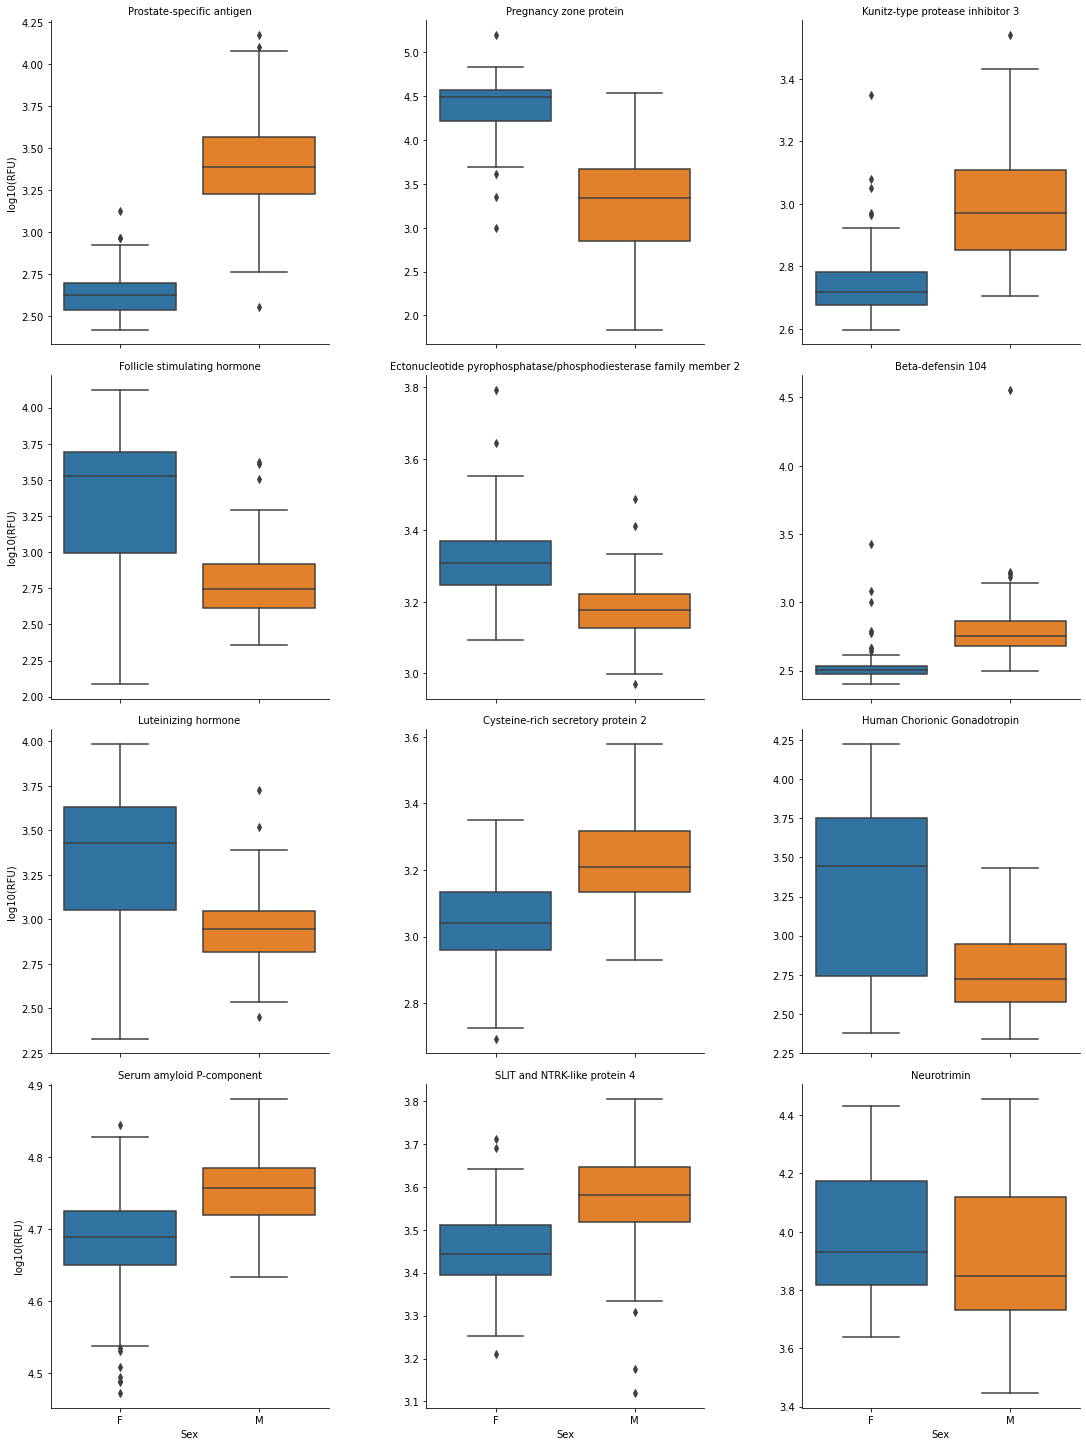

In [26]:
tt_df= (
    filtered_transformed_data
        .pick_meta(axis=1, names=['TargetFullName'])
        .pick_on_meta(axis=1, name='TargetFullName', values=tt_top_12_analytes)[tt_top_12_analytes]
        .reset_index()
)

tt_melted_df = pd.melt(tt_df, value_vars=tt_top_12_analytes, id_vars='Sex', value_name='log10(RFU)')

tt_p = sns.catplot(
    x='Sex',
    y='log10(RFU)',
    col='TargetFullName',
    data=tt_melted_df,
    kind='box',
    col_wrap=3,
    sharey=False
)
tt_p.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.show()

## Logistic Regression (Predict Sex)

In [27]:
# Import the libraries that we need for this analysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import pearsonr
import statsmodels.api as sm
from IPython.display import HTML

### Prepare the data for LogisticRegression

In [28]:
# Wrangle `clean_data` into a simpler form
logr_x_df = (
    clean_data
        .pick_meta(axis=1, names=['SeqId', 'TargetFullName'])
        .reset_index(drop=True)
)
logr_y_df = (
    clean_data.index.get_level_values('Group')
)

# Split the dataset into train and test, holding back 25 samples for testing
logr_x_train, logr_x_test, logr_y_train, logr_y_test = train_test_split(logr_x_df, logr_y_df, test_size=25, random_state=0)

### Perform univariate logistic regression for each aptamer


In [29]:
logr_apt_perf = []
for seq_info in logr_x_train:
    x = sm.add_constant(logr_x_train[seq_info]) # Need to add the intercept term since sm.GLM does not automatically do it
    mod = sm.GLM(logr_y_train, x, family=sm.families.Binomial())
    res = mod.fit()
    logr_apt_perf.append(res.summary2().tables[1].loc[[seq_info]])

### Wrangle the GLM results of each aptamer into a dataframe and sort them by p-value


In [32]:
logr_df = pd.concat(logr_apt_perf).reset_index()
logr_df['SeqId'] = [x[0] for x in logr_df['index']]
logr_df['TargetFullName'] = [x[1] for x in logr_df['index']]
logr_df = logr_df.drop('index', axis=1)
logr_df = logr_df[['SeqId', 'TargetFullName', 'Coef.', 'Std.Err.', 'z', 'P>|z|', '[0.025', '0.975]']].set_index('SeqId')
logr_df_sorted = logr_df.sort_values('P>|z|')
HTML(logr_df_sorted.head(20).to_html()) # Need to use HTML here to display nicely for this README

,TargetFullName,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
SeqId,,,,,,,
6580-29,Pregnancy zone protein,-3.079818,0.489558,-6.291020,3.153866e-10,-4.039334,-2.120302
5763-67,Beta-defensin 104,2.974778,0.478400,6.218181,5.029509e-10,2.037131,3.912425
3032-11,Follicle stimulating hormone,-1.505718,0.250398,-6.013292,1.817935e-09,-1.996490,-1.014946
7926-13,Kunitz-type protease inhibitor 3,2.887475,0.482526,5.984087,2.176067e-09,1.941742,3.833208
16892-23,Ectonucleotide pyrophosphatase/phosphodiesterase family member 2,-2.335113,0.396641,-5.887216,3.927542e-09,-3.112516,-1.557710
9282-12,Cysteine-rich secretory protein 2,1.768026,0.309050,5.720837,1.060006e-08,1.162299,2.373754
2953-31,Luteinizing hormone,-1.319728,0.240323,-5.491466,3.986115e-08,-1.790753,-0.848702
4914-10,Human Chorionic Gonadotropin,-1.244551,0.229781,-5.416240,6.086534e-08,-1.694914,-0.794188
8468-19,Prostate-specific antigen,5.841131,1.113030,5.247953,1.537986e-07,3.659632,8.022630


### Fit model

In [33]:
logr_top_analytes = [(index, row['TargetFullName']) for index, row in logr_df_sorted.head(5).iterrows()] # Select the top 5 aptamers based on p-value
x = sm.add_constant(logr_x_train[logr_top_analytes])
logr_mod = sm.GLM(logr_y_train, x, family=sm.families.Binomial())
logr_res = logr_mod.fit()
logr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  145
Model:                            GLM   Df Residuals:                      139
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.4167
Date:                Fri, 25 Sep 2020   Deviance:                       16.833
Time:                        15:33:26   Pearson chi2:                     17.8
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                1.6106      1.178      1.367      0.172      -0.699       3.920
('6580-29', 'Pregnancy zone protein')                                               -7.0008      3.112     -2.250      0.024     -13.099      -0.902
('5763-67', 'Beta-defensin 104')                                                     2.7821      1.255      2.217      0.027       0.322       5.242
('3032-11', 'Follicle stimulating hormone')                                         -1.1722      0.818     -1.432      0.152      -2.776       0.432
('7926-13', 'Kunitz-type protease inhibitor 3')                                      2.2901      1.053      2.174      0.030       0.226       4.354
('16892-23', 'Ectonucleotide pyrophosphatase/phosphodiesterase family member 2')    -3.6045      1.498     -2.407      0.016      -6.540      -0.669
====================================================================================================================================================
"""

In [34]:
# Create confusion matrix
x = sm.add_constant(logr_x_test[logr_top_analytes])
logr_predictions = [1 if val > 0.5 else 0 for val in logr_res.predict(x)]
cm = metrics.confusion_matrix(logr_y_test.values, logr_predictions)

In [35]:
# Print out performance metrics via Pandas
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
logr_perf_df = pd.DataFrame.from_records({
    'Sensitivity': tp / (tp + fn),
    'Specificity': tn / (tn + fp),
    'Accuracy': (tp + tn) / sum(sum(cm)),
    'PPV': tp / (tp + fp),
    'NPV': tn / (tn + fn)
}, index=['Value'])
HTML(logr_perf_df.to_html())

,Accuracy,NPV,PPV,Sensitivity,Specificity
Value,1.0,1.0,1.0,1.0,1.0


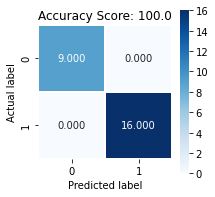

In [36]:
# Display the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(100 * logr_perf_df['Accuracy'].values[0])
plt.title(all_sample_title)
plt.show()

## Linear Regression (Predict Age)
We use the same `clean_data` as the logistic regression analysis above.

### Wrangle data

In [37]:
# Wrangle `clean_data` into a simpler form
linr_x_df = (
    clean_data
        .pick_meta(axis=1, names=['SeqId', 'TargetFullName'])
        .reset_index(drop=True)
)
linr_y = (
    [float(age) for age in clean_data.index.get_level_values('Age')]
)

# Split the dataset into train and test, holding back 25 samples for testing
linr_x_train, linr_x_test, linr_y_train, linr_y_test = train_test_split(linr_x_df, linr_y, test_size=25, random_state=5)

### Perform univariate linear regression for each aptamer


In [38]:
linr_apt_perf = []
for seq_info in linr_x_df:
    x = sm.add_constant(linr_x_train[seq_info])
    mod = sm.OLS(linr_y_train, x)
    res = mod.fit()
    linr_apt_perf.append(res.summary2().tables[1].loc[[seq_info]])

### Wrangle the GLM results of each aptamer into a dataframe and sort them by p-value


In [39]:
linr_res_df = pd.concat(linr_apt_perf).reset_index()
linr_res_df['SeqId'] = [x[0] for x in linr_res_df['index']]
linr_res_df['TargetFullName'] = [x[1] for x in linr_res_df['index']]
linr_res_df = linr_res_df.drop('index', axis=1)
linr_res_df = linr_res_df[['SeqId', 'TargetFullName', 'Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]']].set_index('SeqId')
linr_sorted_res_df = linr_res_df.sort_values('P>|t|')
HTML(linr_sorted_res_df.head(20).to_html())

,TargetFullName,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
SeqId,,,,,,,
3045-72,Pleiotrophin,6.713339,0.865578,7.755906,1.506400e-12,5.002359,8.424320
4374-45,Growth/differentiation factor 15,6.766537,0.902926,7.494011,6.377086e-12,4.981730,8.551343
3024-18,Alpha-2-antiplasmin,-6.258739,0.895850,-6.986373,9.854830e-11,-8.029558,-4.487920
6392-7,WNT1-inducible-signaling pathway protein 2,6.206203,0.895426,6.931007,1.321588e-10,4.436222,7.976185
8480-29,EGF-containing fibulin-like extracellular matrix protein 1,6.179473,0.900370,6.863260,1.889770e-10,4.399719,7.959227
15640-54,Transgelin,6.159769,0.905043,6.806048,2.552783e-10,4.370777,7.948761
15533-97,Macrophage scavenger receptor types I and II,5.986741,0.907615,6.596127,7.616175e-10,4.192666,7.780815
15386-7,"Fatty acid-binding protein, adipocyte",6.130562,0.931954,6.578182,8.355679e-10,4.288376,7.972748
16818-200,CUB domain-containing protein 1,5.919909,0.902842,6.556970,9.321408e-10,4.135268,7.704550


### Feed top 8 SOMAmers into statsmodels OLS regression

In [40]:
linr_top_analytes = [(index, row['TargetFullName']) for index, row in linr_sorted_res_df.head(8).iterrows()]
x = sm.add_constant(linr_x_train[linr_top_analytes])
mod = sm.OLS(linr_y_train, x).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     17.05
Date:                Fri, 25 Sep 2020   Prob (F-statistic):           2.29e-17
Time:                        15:34:06   Log-Likelihood:                -522.29
No. Observations:                 145   AIC:                             1063.
Df Residuals:                     136   BIC:                             1089.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
const                                                                        55.5436      0.765     72.602      0.000      54.031      57.057
('3045-72', 'Pleiotrophin')                                                   1.6913      1.197      1.413      0.160      -0.676       4.059
('4374-45', 'Growth/differentiation factor 15')                               1.2404      1.258      0.986      0.326      -1.247       3.728
('3024-18', 'Alpha-2-antiplasmin')                                           -2.5113      0.910     -2.758      0.007      -4.312      -0.711
('6392-7', 'WNT1-inducible-signaling pathway protein 2')                      1.5143      0.997      1.519      0.131      -0.457       3.486
('8480-29', 'EGF-containing fibulin-like extracellular matrix protein 1')     2.1363      0.972      2.197      0.030       0.214       4.059
('15640-54', 'Transgelin')                                                    1.2006      1.010      1.189      0.237      -0.796       3.198
('15533-97', 'Macrophage scavenger receptor types I and II')                  0.8792      1.223      0.719      0.474      -1.540       3.298
('15386-7', 'Fatty acid-binding protein, adipocyte')                          1.1453      1.180      0.971      0.333      -1.188       3.479
==============================================================================
Omnibus:                        2.712   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.501
Skew:                          -0.322   Prob(JB):                        0.286
Kurtosis:                       3.008   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Compute predictions on test set

In [41]:
x = sm.add_constant(linr_x_test[linr_top_analytes])
linr_predictions = mod.predict(x)
linr_pred_df = pd.DataFrame({
    'Actual Age': linr_y_test,
    'Predicted Age': linr_predictions
})

linr_pred_df['Pred Error'] = linr_pred_df['Predicted Age'] - linr_pred_df['Actual Age']

### Compute model performance

In [42]:
# Lin's Concordance Correl. Coef.
# Accounts for location + scale shifts
def linCCC(x, y):
    if len(x) != len(y):
        raise Exception('Arrays are not the same length!')
    a = 2 * pearsonr(x, y)[0] * np.std(x, ddof=1) * np.std(y, ddof=1)
    b = np.var(x, ddof=1) + np.var(y, ddof=1) + (np.mean(x) - np.mean(y))**2
    return a / b

n = linr_x_test.shape[0]
p = len(linr_top_analytes)

# Regression metrics
linr_metrics_df = pd.DataFrame({
    'rss': linr_pred_df['Pred Error'].apply(lambda x: x**2).sum(), # residual sum of squares
    'tss': sum((linr_pred_df['Actual Age'] - linr_pred_df['Actual Age'].mean()) ** 2), # total sum of squares
    'R2': pearsonr(linr_pred_df['Actual Age'], linr_pred_df['Predicted Age'])[0] ** 2, # R-squared Pearson approx.
    'MAE': np.mean(np.abs(linr_pred_df['Pred Error'])), # Mean absolute error
    'RMSE': np.sqrt(np.mean(linr_pred_df['Pred Error'] ** 2)), # Root mean squared error
    'CCC': linCCC(linr_predictions, linr_y_test) # Lins concordance correlation coefficient
}, index=['Value'])

linr_metrics_df['rsq'] = 1 - (linr_metrics_df['rss'] / linr_metrics_df['tss']) # R-squared
linr_metrics_df['rsqadj'] = max(0, 1 - (1 - linr_metrics_df['rsq'][0]) * (n - 1) / (n - p - 1)), # Adjusted R-squared

HTML(linr_metrics_df.to_html())

,rss,tss,R2,MAE,RMSE,CCC,rsq,rsqadj
Value,989.768231,2771.84,0.674484,5.214434,6.292116,0.752326,0.64292,0.46438


### Visualize performance via concordance plot of predicted and actual values

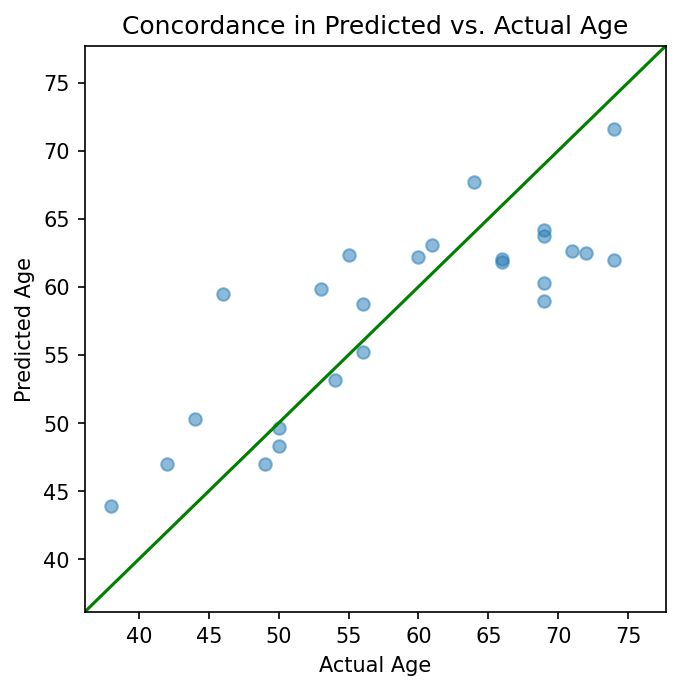

In [43]:
f, ax = plt.subplots(1, figsize=(5, 5), dpi=150)
plot_range = [linr_pred_df[['Actual Age', 'Predicted Age']].min().min() * 0.95, linr_pred_df[['Actual Age', 'Predicted Age']].max().max() * 1.05]
ax.plot(plot_range, plot_range, c='g')
ax.scatter(linr_pred_df['Actual Age'], linr_pred_df['Predicted Age'], alpha=0.5)
ax.set(
    xlim=plot_range,
    xlabel='Actual Age',
    ylim=plot_range,
    ylabel='Predicted Age',
    title='Concordance in Predicted vs. Actual Age'
)
plt.show()

### Closing Remarks

  - Many variants of above possible.
  - Goal to provide general framework to handle SomaLogic data.
  - Not definitive guide in statistical theory, etc.

-----

## MIT LICENSE

  - See [LICENSE](LICENSE)
  - The MIT
        License:
      - <https://choosealicense.com/licenses/mit/>
      - [https://tldrlegal.com/license/mit-license/](https://tldrlegal.com/license/mit-license)

-----